# Advanced Certification Programme in AI and MLOps
## A programme by IISc and TalentSprint
### Mini-Project 1: Resume Classification

## Learning Objectives

At the end of the mini-project, you will be able to :

* perform data preprocessing, EDA on the resume dataset
* fine-tune Bert model for resume classification

## Dataset Description

The data is in CSV format, with two features: Category, and Resume.

**Category** -  Industry sector to which the resume belongs to, and

**Resume** - The complete CV (text) of the candidate.

##  Grading = 10 Points

## Information

Companies often receive thousands of resumes for each job posting and employ dedicated screening officers to screen qualified candidates. Finding suitable candidates for an open role from a database of 1000s of resumes can be a tough task. Automated resume categorization can speeden the candidate selection process. Such automation can really ease the tedious process of fair screening and shortlisting the right candidates and aid quick decisionmaking.

To learn more about this, click [here](https://www.sciencedirect.com/science/article/pii/S187705092030750X).

**Problem Statement:** Fine-tune a pre-trained Bert model for resume classification.

*For fine-tuning Bert, refer to the HuggingFace platform session held on 17 Aug.*

### Install dependencies

After installing the below dependencies ***Restart the session/runtime***.

In [ ]:
!pip -q uninstall pyarrow -y
!pip -q install pyarrow==15.0.2
!pip -q install datasets
!pip -q install accelerate
!pip -q install transformers

# Ignore the Error/Warning showing after running this cell

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
!wget https://lh3.googleusercontent.com/keep-bbsk/AFgXFlLshEsxcecs0h-7bdhC4yooaOSBeDh7O0N5aN0-WK66-Yd9GpZI4IYz2-d8s9adaWj1zMgOAtxdUsB_jc2xgElzb8fl7lEi59ICDH_i-UnfzMkOhqcN-A=s361 -O img.gif

--2025-01-11 03:49:53--  https://lh3.googleusercontent.com/keep-bbsk/AFgXFlLshEsxcecs0h-7bdhC4yooaOSBeDh7O0N5aN0-WK66-Yd9GpZI4IYz2-d8s9adaWj1zMgOAtxdUsB_jc2xgElzb8fl7lEi59ICDH_i-UnfzMkOhqcN-A=s361
Resolving lh3.googleusercontent.com (lh3.googleusercontent.com)... 142.251.175.132, 2404:6800:4003:c1c::84
Connecting to lh3.googleusercontent.com (lh3.googleusercontent.com)|142.251.175.132|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2025-01-11 03:49:53 ERROR 403: Forbidden.



### <font color="#990000">Restart Session/Runtime</font>

### Import required packages

In [ ]:
from datasets import Dataset, DatasetDict

from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from transformers import TrainingArguments
from transformers import Trainer
from transformers import pipeline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Downloading the data

In [ ]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/CDS/Datasets/UpdatedResumeDataSet.csv
!ls | grep '.csv'

UpdatedResumeDataSet.csv


**Exercise 1: Read the UpdatedResumeDataset.csv dataset [0.5 Mark]**

**Hint:** pd.read_csv( , encoding='utf-8')

In [ ]:
# Read the dataset
# YOUR CODE HERE
data = pd.read_csv('/content/UpdatedResumeDataSet.csv', encoding='utf-8')
# Display the first few rows
print(data.head())
# Check dataset information
print(data.info())

       Category                                             Resume
0  Data Science  Skills * Programming Languages: Python (pandas...
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2  Data Science  Areas of Interest Deep Learning, Control Syste...
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB
None


In [ ]:
data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


### Pre-processing and EDA

**Exercise 2: Display  all the categories of resumes and their counts in the dataset [0.5 Mark]**



In [ ]:
# Display the distinct categories of resume
# YOUR CODE HERE

distinct_categories = data['Category'].unique()

print("Distinct categories of resumes:\n")
print(distinct_categories)

Distinct categories of resumes:

['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [ ]:
# Displaying the number of distinct categories of resume
# YOUR CODE HERE
num_distinct_categories = data['Category'].nunique()
print(f"Number of distinct categories of resumes: {num_distinct_categories}")


Number of distinct categories of resumes: 25


In [ ]:
# Display the distinct categories of resume and the number of records belonging to each category
# YOUR CODE HERE
category_counts = data['Category'].value_counts()
print("Categories and their counts:\n")
print(category_counts)

Categories and their counts:

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64


**Exercise 3: Create the count plot of different categories [0.5 Mark]**

**Hint:** Use `sns.countplot()`

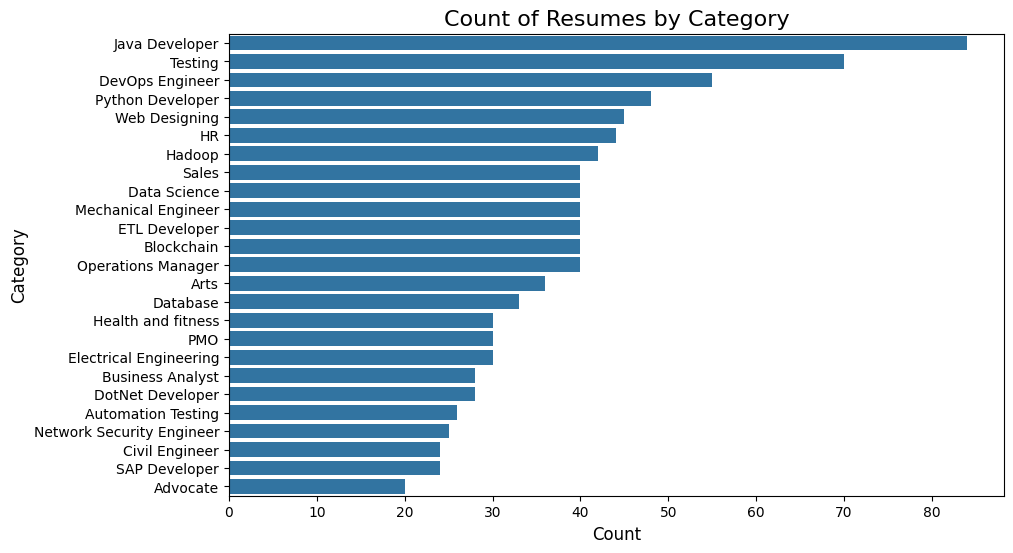

In [ ]:
# YOUR CODE HERE
# Create the count plot for categories
plt.figure(figsize=(10, 6))
sns.countplot(y='Category', data=data, order=data['Category'].value_counts().index)

# Add title and labels
plt.title("Count of Resumes by Category", fontsize=16)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Category", fontsize=12)

# Show the plot
plt.show()

**Exercise 4: Create a pie plot depicting the percentage of resume distributions category-wise. [0.5 mark]**

**Hint:** Use [plt.pie()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html) and [plt.get_cmap](https://matplotlib.org/stable/tutorials/colors/colormaps.html) for color mapping the pie chart.

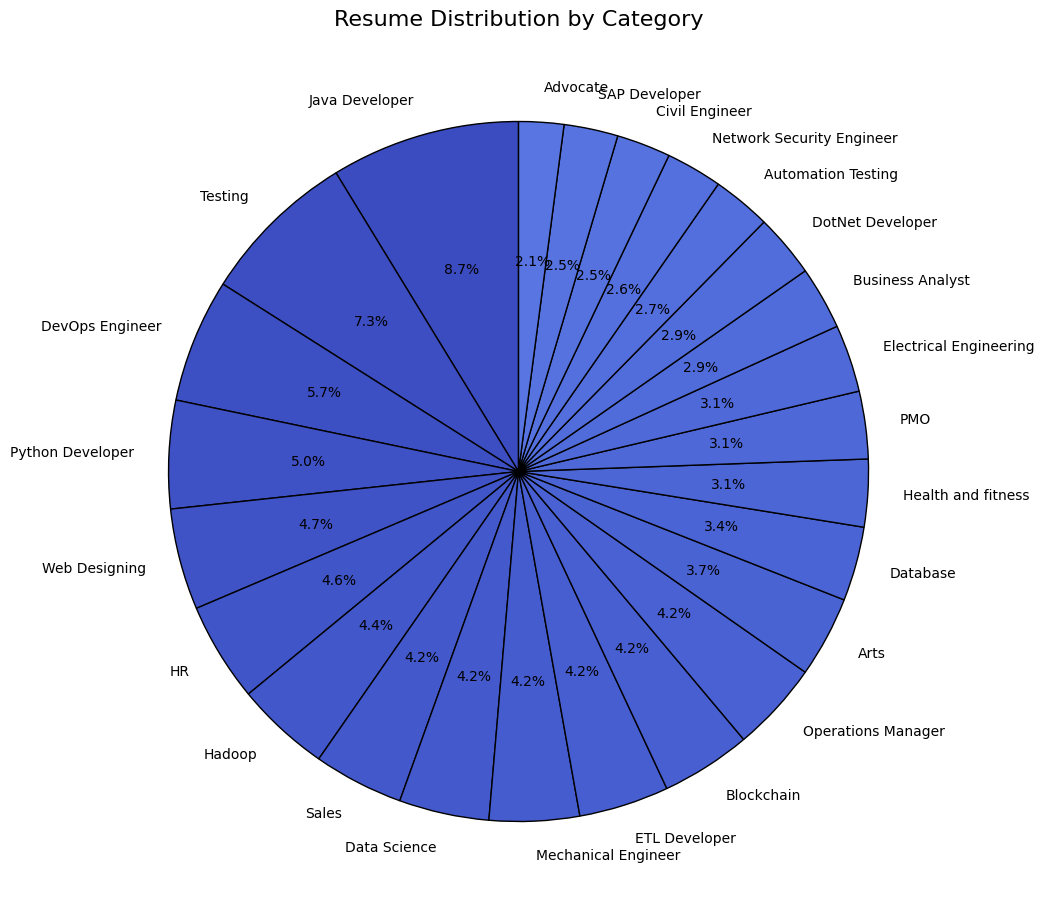

In [ ]:
# YOUR CODE HERE to display pie chart with color coding (eg. `coolwarm`)
targetCounts = data['Category'].value_counts()
targetLabels  = targetCounts.index
# Make square figures and axes
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)

# Color map for the pie chart (coolwarm)
colors = plt.get_cmap("coolwarm")(range(len(targetLabels)))  # Apply coolwarm color map

# Create the pie chart with color coding
plt.subplot(the_grid[0, 0])  # Place the pie chart in the first grid cell
plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})

# Add title and show the plot
plt.title("Resume Distribution by Category", fontsize=16)
plt.show()


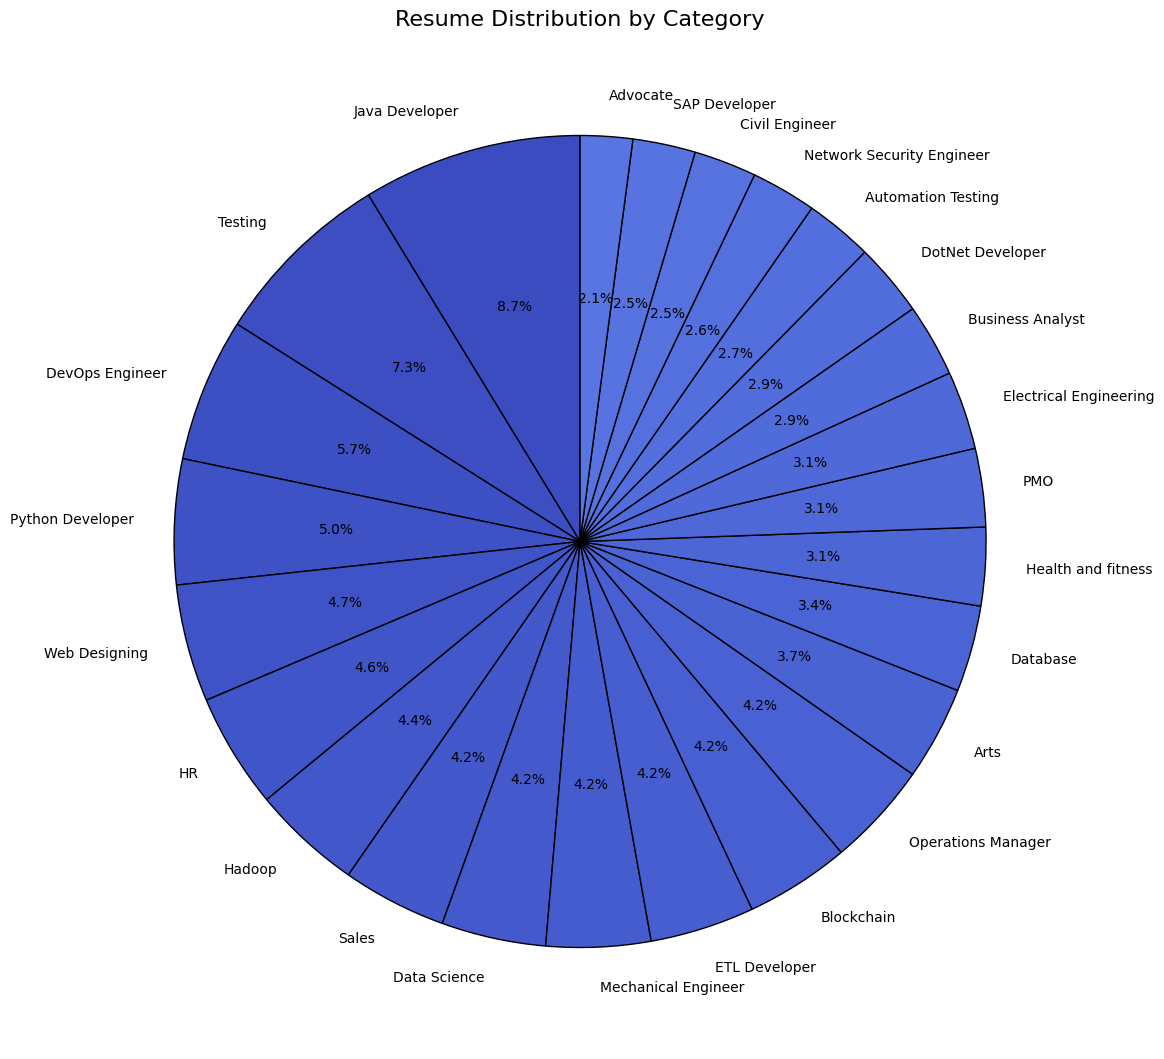

In [ ]:
# Get the counts of categories - Optional
targetCounts = data['Category'].value_counts()
targetLabels = targetCounts.index

# Create a square figure and axes
plt.figure(figsize=(29, 29))  # Increased size for better spacing
the_grid = GridSpec(2, 2)

# Color map for the pie chart (coolwarm)
colors = plt.get_cmap("coolwarm")(range(len(targetLabels)))  # Apply coolwarm color map

# Create the pie chart with color coding
plt.subplot(the_grid[0, 0])  # Place the pie chart in the first grid cell
plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'}, labeldistance=1.1)

# Add title and show the plot
plt.title("Resume Distribution by Category", fontsize=16)
plt.show()

**Exercise 5: Convert all the `Resume` text to lower case and remove trailing spaces [0.5 Mark]**




In [ ]:
# Convert all characters to lowercase and remove trailing spaces
# YOUR CODE
# Convert the 'Resume' column to lowercase and remove trailing spaces
data['Resume'] = data['Resume'].str.lower().str.strip()

# Display the first few rows to check the changes
print(data['Resume'].head())

0    skills * programming languages: python (pandas...
1    education details \r\nmay 2013 to may 2017 b.e...
2    areas of interest deep learning, control syste...
3    skills â¢ r â¢ python â¢ sap hana â¢ table...
4    education details \r\n mca   ymcaust,  faridab...
Name: Resume, dtype: object


### Cleaning Resume

**Exercise 6: Define a function to clean the resume text [2 Mark]**

In the text there are special characters, urls, hashtags, mentions, etc. You need to remove for the following:  

* URLs: For reference click [here](https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python)
* RT | cc: For reference click [here](https://www.machinelearningplus.com/python/python-regex-tutorial-examples/)
* Hashtags, # and Mentions, @
* punctuations
* extra whitespace

PS: Use the provided reference similarly for removing any other such elements.

After cleaning as above, store the Resume Text in a separate column (New Feature say `Cleaned_Resume`).


In [ ]:
import re
import string

def cleanResume(resumeText):
    # Remove URLs
    resumeText = re.sub(r'http\S+|www\S+', '', resumeText)

    # Remove "RT" and "cc"
    resumeText = re.sub(r'\b(rt|cc)\b', '', resumeText, flags=re.IGNORECASE)

    # Remove hashtags and mentions
    resumeText = re.sub(r'[@#]\w+', '', resumeText)

    # Remove punctuation
    resumeText = resumeText.translate(str.maketrans('', '', string.punctuation))

    # Remove extra whitespace
    resumeText = re.sub(r'\s+', ' ', resumeText).strip()

    #Remove special Characters
    resumeText = re.sub('[^A-Za-z0-9]+', ' ', resumeText)

    return resumeText


URLs Removal: re.sub(r'http\S+|www\S+', '', resume_text) removes any substring that starts with http or www, which indicates a URL.
Remove "RT" and "cc": re.sub(r'\b(rt|cc)\b', '', resume_text) removes any occurrences of "RT" or "cc" that appear as whole words.
Remove Hashtags and Mentions: re.sub(r'[@#]\w+', '', resume_text) removes hashtags (#) and mentions (@).
Remove Punctuation: resume_text.translate(str.maketrans('', '', string.punctuation)) removes all punctuation marks using the string.punctuation constant.
Remove Extra Whitespace: re.sub(r'\s+', ' ', resume_text).strip() replaces multiple spaces with a single space and removes leading/trailing spaces.


In [ ]:
# Apply the function defined above and save the
# Apply the cleaning function to the 'Resume' column and store the result in a new column 'Cleaned_Resume'
data['Cleaned_Resume'] = data['Resume'].apply(cleanResume)

# Display the first few rows to confirm
data[['Resume', 'Cleaned_Resume']].head()

,Resume,Cleaned_Resume
0,skills * programming languages: python (pandas...,skills programming languages python pandas num...
1,education details \r\nmay 2013 to may 2017 b.e...,education details may 2013 to may 2017 be uitr...
2,"areas of interest deep learning, control syste...",areas of interest deep learning control system...
3,skills â¢ r â¢ python â¢ sap hana â¢ table...,skills r python sap hana tableau sap hana sql ...
4,"education details \r\n mca ymcaust, faridab...",education details mca ymcaust faridabad haryan...


**Exercise 7: Convert the categorical variable `Category` to a numerical feature and make a different column <font color="#990000">`label`</font>, which can be treated as the target variable [0.5 Mark]**

**Hint:** Use [`sklearn.preprocessing.LabelEncoder()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) method

In [ ]:
from sklearn.preprocessing import LabelEncoder

# YOUR CODE HERE
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Convert the 'Category' column into numerical values and store it in a new column 'label'
data['label'] = label_encoder.fit_transform(data['Category'])

# Display the first few rows to confirm the change
data[['Category', 'label']]

,Category,label
0,Data Science,6
1,Data Science,6
2,Data Science,6
3,Data Science,6
4,Data Science,6
...,...,...
957,Testing,23
958,Testing,23
959,Testing,23
960,Testing,23


In [ ]:
# Get the number of unique categories in the 'Category' column
num_unique_labels = data['Category'].nunique()

# Display the result
print(f'Number of unique labels: {num_unique_labels}')

Number of unique labels: 25


**Exercise 8: Plot the histogram of words count of `Cleaned_Resume` text [0.5 Mark]**

**Hint:** Use sns.distplot()

In [ ]:
# Calculate word count for each resume in the 'Cleaned_Resume' column
data['Count'] = data['Cleaned_Resume'].apply(lambda x: len(x.split()))

In [ ]:
data.head()

,Category,Resume,Cleaned_Resume,label,Count
0,Data Science,skills * programming languages: python (pandas...,skills programming languages python pandas num...,6,637
1,Data Science,education details \r\nmay 2013 to may 2017 b.e...,education details may 2013 to may 2017 be uitr...,6,151
2,Data Science,"areas of interest deep learning, control syste...",areas of interest deep learning control system...,6,254
3,Data Science,skills â¢ r â¢ python â¢ sap hana â¢ table...,skills r python sap hana tableau sap hana sql ...,6,926
4,Data Science,"education details \r\n mca ymcaust, faridab...",education details mca ymcaust faridabad haryan...,6,61


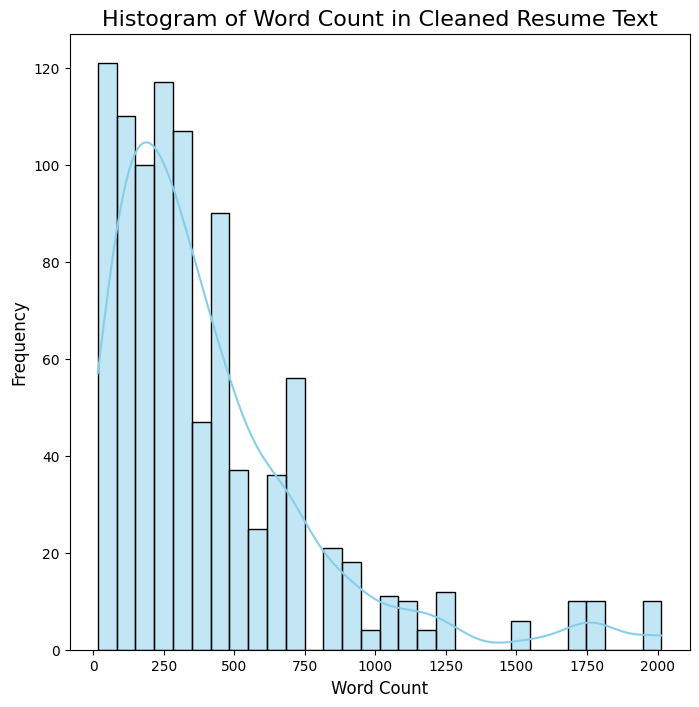

In [ ]:

# Plot the histogram of word count
plt.figure(figsize=(8, 8))
sns.histplot(data['Count'], kde=True, bins=30, color='skyblue')

# Add labels and title
plt.title('Histogram of Word Count in Cleaned Resume Text', fontsize=16)
plt.xlabel('Word Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.show()


### Train Test Split

**Exercise 9: Split the dataset into training, validation, and testing set [0.5 Mark]**

* Do stratified splitting using `label` column

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing) using stratified splitting based on 'label'
train_test_df, val_df = train_test_split(data, test_size=0.2, stratify=data['label'], random_state=42)

# Split the training data further into training and validation sets (80% training, 20% validation) using stratified splitting
train_df, test_df = train_test_split(train_test_df, test_size=0.2, stratify=train_test_df['label'], random_state=42)

# Display the sizes of each split
print(f'Training set size: {len(train_df)}')
print(f'Validation set size: {len(val_df)}')
print(f'Test set size: {len(test_df)}')


Training set size: 615
Validation set size: 193
Test set size: 154


In [ ]:
train_df.head(2)

,Category,Resume,Cleaned_Resume,label,Count
591,Python Developer,training attended: 1. successfully completed e...,training attended 1 successfully completed esd...,20,321
713,Database,education details \r\njanuary 2016 bsc. mumba...,education details january 2016 bsc mumbai maha...,7,312


### Convert to HuggingFace Dataset

**Exercise 10: Convert Pandas dataframe to HuggingFace Dataset [1 Mark]**

**Hint:**

    import pandas as pd
    from datasets import Dataset, DatasetDict

    tdf = pd.DataFrame({"a": [1, 2, 3], "b": ['hello', 'ola', 'thammi']})
    vdf = pd.DataFrame({"a": [4, 5, 6], "b": ['four', 'five', 'six']})
    tds = Dataset.from_pandas(tdf)
    vds = Dataset.from_pandas(vdf)

    ds = DatasetDict()

    ds['train'] = tds
    ds['validation'] = vds

    print(ds)

In [ ]:
from datasets import Dataset, DatasetDict

train_ds = Dataset.from_pandas(train_df)
val_ds = Dataset.from_pandas(val_df)
test_ds = Dataset.from_pandas(test_df)

ds = DatasetDict()


ds['train'] = train_ds
ds['validation'] = val_ds
ds['test'] = test_ds


In [ ]:
ds['train']

Dataset({
    features: ['Category', 'Resume', 'Cleaned_Resume', 'label', 'Count', '__index_level_0__'],
    num_rows: 615
})

### Tokenizer

**Exercise 11: Load tokenizer for checkpoint `distilbert-base-uncased` [0.5 Mark]**

**Hint:** `AutoTokenizer`

In [ ]:
# Load tokenizer
#tokenizer = # YOUR CODE HERE

In [ ]:
from transformers import AutoTokenizer

# Load the tokenizer for the 'distilbert-base-uncased' model
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

# Test the tokenizer by encoding a sample text
sample_text = "This is a sample resume text."
encoded_input = tokenizer(sample_text)

# Display the encoded input
print(encoded_input)


{'input_ids': [101, 2023, 2003, 1037, 7099, 13746, 3793, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [ ]:

def tokenize_fn(batch):
    # Tokenize the 'Cleaned_Resume' column (or any other text column in your dataset)
    return tokenizer(batch['Cleaned_Resume'], padding=True, truncation=True, max_length=512)



In [ ]:
# Apply the tokenizer to the dataset
tokenized_datasets = ds.map(tokenize_fn, batched=True)
tokenized_datasets

Map:   0%|          | 0/615 [00:00<?, ? examples/s]

Map:   0%|          | 0/193 [00:00<?, ? examples/s]

Map:   0%|          | 0/154 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['Category', 'Resume', 'Cleaned_Resume', 'label', 'Count', '__index_level_0__', 'input_ids', 'attention_mask'],
        num_rows: 615
    })
    validation: Dataset({
        features: ['Category', 'Resume', 'Cleaned_Resume', 'label', 'Count', '__index_level_0__', 'input_ids', 'attention_mask'],
        num_rows: 193
    })
    test: Dataset({
        features: ['Category', 'Resume', 'Cleaned_Resume', 'label', 'Count', '__index_level_0__', 'input_ids', 'attention_mask'],
        num_rows: 154
    })
})

### Load Pre-Trained Model

**Exercise 12: Load pre-trained Bert model with checkpoint `distilbert-base-uncased` and show model summary [0.5 Mark]**

**Hint:** `AutoModelForSequenceClassification`

In [ ]:
from transformers import AutoModelForSequenceClassification


# Load the pre-trained distilbert model with the checkpoint 'distilbert-base-uncased'
model = AutoModelForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=25)  # Adjust 'num_labels' based on your dataset

# Print the model summary
print(model)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


**Exercise 13: Freeze/Un-Freeze different layers  [0.5 Mark]**

**Hint:** Freeze layers starting with name *distilbert*


In [ ]:
# Display layers name

# YOUR CODE HERE
# Verify which layers are frozen and which are unfrozen
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"Layer {name} is unfrozen.")
    else:
        print(f"Layer {name} is frozen.")

Layer distilbert.embeddings.word_embeddings.weight is unfrozen.
Layer distilbert.embeddings.position_embeddings.weight is unfrozen.
Layer distilbert.embeddings.LayerNorm.weight is unfrozen.
Layer distilbert.embeddings.LayerNorm.bias is unfrozen.
Layer distilbert.transformer.layer.0.attention.q_lin.weight is unfrozen.
Layer distilbert.transformer.layer.0.attention.q_lin.bias is unfrozen.
Layer distilbert.transformer.layer.0.attention.k_lin.weight is unfrozen.
Layer distilbert.transformer.layer.0.attention.k_lin.bias is unfrozen.
Layer distilbert.transformer.layer.0.attention.v_lin.weight is unfrozen.
Layer distilbert.transformer.layer.0.attention.v_lin.bias is unfrozen.
Layer distilbert.transformer.layer.0.attention.out_lin.weight is unfrozen.
Layer distilbert.transformer.layer.0.attention.out_lin.bias is unfrozen.
Layer distilbert.transformer.layer.0.sa_layer_norm.weight is unfrozen.
Layer distilbert.transformer.layer.0.sa_layer_norm.bias is unfrozen.
Layer distilbert.transformer.layer

In [ ]:
# Freezing

# YOUR CODE HERE..
# Freeze all layers starting with 'distilbert'
for name, param in model.named_parameters():
    if name.startswith('distilbert'):
        param.requires_grad = False  # Freezing the parameter
    else:
        param.requires_grad = True   # Unfreezing the parameter




In [ ]:
# Display layers gradient

# YOUR CODE HERE..
# Verify which layers are frozen and which are unfrozen
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"Layer {name} is unfrozen.")
    else:
        print(f"Layer {name} is frozen.")

Layer distilbert.embeddings.word_embeddings.weight is frozen.
Layer distilbert.embeddings.position_embeddings.weight is frozen.
Layer distilbert.embeddings.LayerNorm.weight is frozen.
Layer distilbert.embeddings.LayerNorm.bias is frozen.
Layer distilbert.transformer.layer.0.attention.q_lin.weight is frozen.
Layer distilbert.transformer.layer.0.attention.q_lin.bias is frozen.
Layer distilbert.transformer.layer.0.attention.k_lin.weight is frozen.
Layer distilbert.transformer.layer.0.attention.k_lin.bias is frozen.
Layer distilbert.transformer.layer.0.attention.v_lin.weight is frozen.
Layer distilbert.transformer.layer.0.attention.v_lin.bias is frozen.
Layer distilbert.transformer.layer.0.attention.out_lin.weight is frozen.
Layer distilbert.transformer.layer.0.attention.out_lin.bias is frozen.
Layer distilbert.transformer.layer.0.sa_layer_norm.weight is frozen.
Layer distilbert.transformer.layer.0.sa_layer_norm.bias is frozen.
Layer distilbert.transformer.layer.0.ffn.lin1.weight is frozen

### Metrics

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [ ]:
f1_score(y_true=[1,0,1], y_pred=[1,0,0], average='weighted')

0.6666666666666666

In [ ]:
def compute_metrics(logits_and_labels):
    logits, labels = logits_and_labels
    predictions = np.argmax(logits,axis=-1)
    return {'f1_score': f1_score(y_true=labels, y_pred=predictions, average='weighted')}


**Exercise 14: Fine-tune model on train dataset  [0.5 Mark]**
 * Create `TrainingArguments` class object
 * Create `Trainer` class  object
 * Train it for higher number of epochs say 40 or 50
 * Switch to GPU runtime if needed

**Hint:** Check if the training code is running without any error with CPU runtime, later switch to GPU runtime for faster training. Once trained, save the model, create its zip file, and download into your system.

In [ ]:
'''
from transformers import Trainer, TrainingArguments
from sklearn.metrics import accuracy_score  # Import accuracy_score from sklearn
import torch
import shutil

# Define compute_metrics function using sklearn
def compute_metrics(p):
    preds, labels = p
    preds = preds.argmax(axis=-1)  # Convert logits to predicted class
    return {'accuracy': accuracy_score(labels, preds)}  # Use accuracy_score from sklearn

# Check if GPU is available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Training on: {device}")

# Define compute_metrics function
def compute_metrics(p):
    preds, labels = p
    preds = preds.argmax(axis=-1)  # Convert logits to predicted class
    return metric.compute(predictions=preds, references=labels)

# Check if GPU is available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Training on: {device}")

# Assuming 'model' is already loaded as described earlier
# Set the model to the correct device
model.to(device)

'''

Training on: cuda
Training on: cuda


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [ ]:
# Set up the training arguments

model_output_path = "/content/bert_model"

# Define TrainingArguments
training_args = TrainingArguments(
    output_dir='/content/bert_model',                # Directory to save model checkpoints
    evaluation_strategy="epoch",          # Evaluate after each epoch
    learning_rate=2e-4,                   # Learning rate
    per_device_train_batch_size=8,        # Batch size during training
    per_device_eval_batch_size=8,         # Batch size during evaluation
    num_train_epochs=65,                  # Number of epochs
    weight_decay=0.01,                    # Weight decay
    save_strategy="epoch",                # Save model checkpoint after each epoch
    logging_dir='./logs',                 # Directory for logging
    logging_steps=10,                     # Log every 10 steps
    load_best_model_at_end=True,          # Load the best model at the end of training
    metric_for_best_model="f1_score",     # Metric to determine the best model
    save_total_limit=3,                   # Keep only the last 3 checkpoints
    report_to="none",                     # Suppress reporting to external systems (like wandb)
)


In [ ]:
# Train the model

# Create Trainer object
trainer = Trainer(
    model=model,  # The model to train
    args=training_args,  # Training arguments
    train_dataset=tokenized_datasets["train"],  # Training dataset
    eval_dataset=tokenized_datasets["validation"],  # Validation dataset
    compute_metrics=compute_metrics,  # Compute metrics on evaluation
)

# Train the model
trainer.train()


Epoch,Training Loss,Validation Loss,F1 Score
1,3.113300,3.034264,0.074360
2,3.010300,2.856909,0.110885
3,2.724000,2.674119,0.237799
4,2.606400,2.488357,0.311901
5,2.280300,2.323889,0.247537
6,2.220400,2.165745,0.400013
7,2.097300,2.033391,0.479593
8,2.030300,1.926399,0.326774
9,1.900900,1.799258,0.513350
10,1.903900,1.689371,0.536124


TrainOutput(global_step=4620, training_loss=0.8639688216504596, metrics={'train_runtime': 247.0935, 'train_samples_per_second': 149.336, 'train_steps_per_second': 18.697, 'total_flos': 4890051952128000.0, 'train_loss': 0.8639688216504596, 'epoch': 60.0})

In [ ]:
print(set(tokenized_datasets['train']['label']))  # Check the unique label values


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24}


In [ ]:
# Save the model
trainer.save_model('saved_bert_model')

In [ ]:
!ls

bert_model		   img.gif	      sample_data	saved_bert_model.zip
bert_pretrained_tokenizer  pre_trained_model  saved_bert_model	UpdatedResumeDataSet.csv


In [ ]:
# Create a Zip file and download
!zip -r saved_bert_model.zip saved_bert_model

updating: saved_bert_model/ (stored 0%)
updating: saved_bert_model/model.safetensors (deflated 8%)
updating: saved_bert_model/training_args.bin (deflated 52%)
updating: saved_bert_model/config.json (deflated 64%)


In [ ]:
tokenizer.save_pretrained('bert_pretrained_tokenizer')

('bert_pretrained_tokenizer/tokenizer_config.json',
 'bert_pretrained_tokenizer/special_tokens_map.json',
 'bert_pretrained_tokenizer/vocab.txt',
 'bert_pretrained_tokenizer/added_tokens.json',
 'bert_pretrained_tokenizer/tokenizer.json')

### Load Model

**Exercise 15: Load the saved model and create a pipeline to perform text classification [1 Mark]**

 * Create the pipeline object for text classification
 * Create a `make_prediction` function to use pipeline object and output the prediction label

**Hint:** pipeline()

In [ ]:
from transformers import pipeline

In [ ]:
#my_model = # YOUR CODE HERE.. to load text classification pipeline

# Load the saved model and tokenizer
model_path = "/content/saved_bert_model"
tokenizer_path = '/content/bert_pretrained_tokenizer'
loaded_model =  AutoModelForSequenceClassification.from_pretrained(model_path)
loaded_tokenizer = AutoTokenizer.from_pretrained(tokenizer_path)

# Create a pipeline for text classification
text_classification_pipeline = pipeline(
    "text-classification",
    model=loaded_model,
    tokenizer=loaded_tokenizer
)


Device set to use cuda:0


In [ ]:
# Function to predict label for a resume text

def make_prediction(input_text):
    """
    Takes a string input and returns the predicted label.
    """
    predictions = text_classification_pipeline(input_text)
    return predictions[0]['label']




In [ ]:
# Test prediction
make_prediction('programming, web designing, coding')

'LABEL_15'

In [ ]:
make_prediction('continuous integration and continuous delivery')

'LABEL_6'

In [ ]:
make_prediction('law student and journalist')

'LABEL_0'

In [ ]:
make_prediction('machine learning, data, EDA, big data, neural networks')

'LABEL_6'

In [ ]:
make_prediction('Analyzing Business requirements')

'LABEL_12'

In [ ]:
make_prediction('Data Analysis , predictive analytics , Python programming , EDA')

'LABEL_6'

In [ ]:
make_prediction('RPA , selenium , Automation Testing ')

'LABEL_3'

## **Optional**: Create a Gradio based web interface to test and display the model predictions

In [ ]:
!pip -q install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.4/321.4 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 96.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.5 MB/s eta 0:00:00


In [ ]:
import gradio

In [ ]:
# Textbox to take Input from user
in_text = gradio.Textbox(lines=10, placeholder=None, value="Enter resume text here", label='Resume Text')


# Textbox to display Output prediction
out_label = gradio.Textbox(type="text", label='Predicted Class Label')


# Gradio interface to create UI
iface = gradio.Interface(fn = make_prediction,             # fine-tuned model is used inside this function
                         inputs = [in_text],
                         outputs = [out_label],
                         title = "Resume Classification",
                         description = "Using fine-tuned Bert model",
                         allow_flagging = 'never')


# Launch interface
iface.launch(share = True)

In [ ]:
labels_data = data[['label','Category']]

In [ ]:
labels_data.drop_duplicates()

,label,Category
0,6,Data Science
40,12,HR
84,0,Advocate
104,1,Arts
140,24,Web Designing
185,16,Mechanical Engineer
225,22,Sales
265,14,Health and fitness
295,5,Civil Engineer
319,15,Java Developer


In [ ]:
data[data['Category'] == 'Automation Testing']

,Category,Resume,Cleaned_Resume,label,Count
455,Automation Testing,* excellent grasping power in learning new con...,excellent grasping power in learning new conce...,2,400
456,Automation Testing,social skills: â¢ ability to establish trust ...,social skills ability to establish trust and w...,2,589
457,Automation Testing,technical skills automation testing â¢ seleni...,technical skills automation testing selenium w...,2,555
458,Automation Testing,"skills agile methodology scrum, kanban, extrem...",skills agile methodology scrum kanban extreme ...,2,884
459,Automation Testing,"technical skills summary i have completed ""cor...",technical skills summary i have completed corp...,2,304
460,Automation Testing,education details \r\n b.tech electronics and ...,education details btech electronics and instru...,2,645
461,Automation Testing,technical skills languages: core java automati...,technical skills languages core java automatio...,2,118
462,Automation Testing,"skills agile methodology scrum, kanban, extrem...",skills agile methodology scrum kanban extreme ...,2,884
463,Automation Testing,"technical skills summary i have completed ""cor...",technical skills summary i have completed corp...,2,304
464,Automation Testing,"skills agile methodology scrum, kanban, extrem...",skills agile methodology scrum kanban extreme ...,2,884
